Program 2 \
CIS 443-01 \
By: Helen Le \
Due Date: 2/26/2025

Enter the number of equipment models:  3
Enter the model name for model 1:  ModelX
Enter the number of abrasion measurements for ModelX:  3
Enter measurement 1 for ModelX in rpm:  700
Enter measurement 2 for ModelX in rpm:  710
Enter measurement 3 for ModelX in rpm:  720
Enter the model name for model 2:  ModelY
Enter the number of abrasion measurements for ModelY:  3
Enter measurement 1 for ModelY in rpm:  710
Enter measurement 2 for ModelY in rpm:  720
Enter measurement 3 for ModelY in rpm:  730
Enter the model name for model 3:  ModelZ
Enter the number of abrasion measurements for ModelZ:  2
Enter measurement 1 for ModelZ in rpm:  500
Enter measurement 2 for ModelZ in rpm:  550



Equipment Model Ratings:
ModelX: AAA
ModelY: AAA
ModelZ: AA


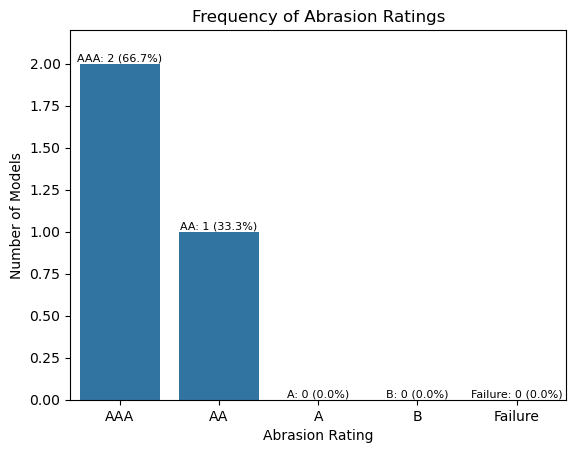

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

def input_measurements():
    """Collect user input for multiple equipment models and their abrasion ratings.
    Return a dictionary with model names as keys and the abrasion measurements as the values."""
    models_dict = {}

    #Ask user for number of models
    num_models = int(input("Enter the number of equipment models: "))

    #Loop through each model to collect abrasion measurements.
    for model_index in range(num_models):
        model_name = input(f"Enter the model name for model {model_index + 1}: ")
        num_measurements = int(input(f"Enter the number of abrasion measurements for {model_name}: "))

        measurements = []

        #Collect abrasion measurements for current model
        for measurement_index in range(num_measurements):
            measurement = float(input(f"Enter measurement {measurement_index + 1} for {model_name} in rpm: "))
            measurements.append(measurement)

        #Store measurements in dictionary under their respective model name.
        models_dict[model_name] = measurements

    return models_dict

def summarize_models(models_dict):
    """Analyze models' abrasion measurements to gain an average, which is then assigned to a rating."""
    rating_categories = {
        "AAA": 0,
        "AA": 0,
        "A": 0,
        "B": 0,
        "Failure": 0
    }

    #Dict to store model's assigned rating
    model_ratings = {}

    #Evaluate model's measurements
    for model, measurements in models_dict.items():
        if not measurements: #will skip models with no measurements
            continue

        #Calculates abrasion average
        abrasion_avg = sum(measurements) / len(measurements)

        #Assign ratings based on CE standard ratings given
        if abrasion_avg >= 707.4:
            rating = "AAA"
        elif 707.4 > abrasion_avg >= 412.6:
            rating = "AA"
        elif 412.6 > abrasion_avg >= 265.3:
            rating = "A"
        elif 265.3 > abrasion_avg >= 147.4:
            rating = "B"
        else:
            rating = "Failure"

        #Store model's rating
        model_ratings[model] = rating
        #Increment count of models in corresponding categories
        rating_categories[rating] += 1

    #Print model ratings
    print("\nEquipment Model Ratings:")
    for model, rating in model_ratings.items():
        print(f"{model}: {rating}")

    #Plot frequency of ratings
    plot_rating_chart(rating_categories, len(models_dict))

#Bar chart

def plot_rating_chart(rating_counts, total_models):
    """Generate bar chart that displays the frequencies of different abrasion ratings of the given models based on their abrasion averages."""

    #Define rating categories in descending order
    categories = ["AAA", "AA", "A", "B", "Failure"]

    #Extract frequency of each rating category
    category_frequencies = [rating_counts.get(rating, 0) for rating in categories]

    #Use Seaborn to create bar plot
    rating_bar_chart = sns.barplot(x=categories, y=category_frequencies)

    #Set chart title and axis labels
    rating_bar_chart.set_title("Frequency of Abrasion Ratings")
    rating_bar_chart.set(xlabel="Abrasion Rating", ylabel="Number of Models")
    rating_bar_chart.set_ylim(0, max(category_frequencies) * 1.10)

    #Add frequency labels on top of each bar
    for patch, freq, category in zip(rating_bar_chart.patches, category_frequencies, categories):
        x = patch.get_x() + (patch.get_width() / 2.0)
        y = patch.get_height()
        label = f'{category}: {freq} ({freq / sum(category_frequencies) * 100:.1f}%)'
        rating_bar_chart.text(x, y, label, ha='center', va='bottom', fontsize=8)

#Execute functions
models_data = input_measurements() #Collect model measurements from user input
summarize_models(models_data) #Process data and display results onto bar chart